In [3]:
from tensorflow import keras
from models.ts_cnn import MULTI_CLASS_TS_CNN as ts_cnn
import numpy as np
from sklearn.model_selection import train_test_split
from models.loader import loader
import matplotlib.pyplot as plt
from sklearn import preprocessing
from utils.normalisation import min_max

In [2]:
# Model Loader:
model = ts_cnn()
model.load_weights('multi_class_categorical_model_weights_2022-10-26.h5')

In [3]:
# Reading Data
slip_acc = np.loadtxt('data/multiclass_validation_data/Slip/incidents_acc.txt')
slip_gyro = np.loadtxt('data/multiclass_validation_data/Slip/incidents_gyro.txt')
trip_acc = np.loadtxt('data/multiclass_validation_data/Trip/incidents_acc.txt')
trip_gyro = np.loadtxt('data/multiclass_validation_data/Trip/incidents_gyro.txt')
no_incident_acc = np.loadtxt('data/multiclass_validation_data/No Incident/no_incidents_acc.txt')
no_incident_gyro = np.loadtxt('data/multiclass_validation_data/No Incident/no_incidents_gyro.txt')

In [4]:
# Stacking
x_slip = np.stack([slip_acc, slip_gyro], axis=1)
x_trip = np.stack([trip_acc, trip_gyro], axis=1)
x_no_incident = np.stack([no_incident_acc, no_incident_gyro], axis=1)
x_negative = np.concatenate([x_no_incident])
x = np.concatenate([x_negative, x_slip, x_trip], axis=0)

# Labels
y_slip = np.ones(x_slip.shape[0]).astype(int)
y_trip = np.ones(x_trip.shape[0]) + 1
y_trip = y_trip.astype(int)
y_negative = np.zeros(x_negative.shape[0]).astype(int)
y_all = np.concatenate([y_negative, y_slip, y_trip])
y = keras.utils.to_categorical(y_all)

print(f'x slip: {x_slip.shape}')
print(f'x trip: {x_trip.shape}')
print(f'x no incident: {x_negative.shape}')
print('____________________________________')

#Check for nans
print(f'x: {x.shape}')
print(f'nans: {np.any(np.isnan(x))}')
print(f'y: {y.shape}')

x slip: (20, 2, 200)
x trip: (32, 2, 200)
x no incident: (64, 2, 200)
____________________________________
x: (116, 2, 200)
nans: False
y: (116, 3)


In [5]:
idx = np.random.permutation(len(x))
x = x[idx]
y = y[idx]

y_val = y.argmax(axis=1)
y_pred = np.argmax(model.predict([x[:,0], x[:,1]]), axis=1)

# find how many positive and negative samples are in the predicted dataset
print(f'prediction_negative: {np.sum(y_pred == 0)}')
print(f'prediction_slip: {np.sum(y_pred == 1)}')
print(f'prediction_trip: {np.sum(y_pred == 2)}')

4/4 [==============================] - 13s 34ms/step
prediction_negative: 82
prediction_slip: 22
prediction_trip: 12


In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_val, y_pred, labels=[0,1,2])

In [9]:
result

array([[47,  9,  8],
       [17,  2,  1],
       [18, 11,  3]], dtype=int64)

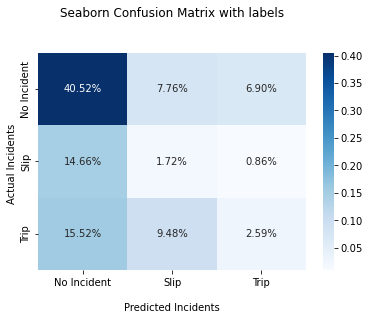

In [24]:
# Matrix without labels
ax = sns.heatmap(result/np.sum(result), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Incidents')
ax.set_ylabel('Actual Incidents ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Incident','Slip', 'Trip'])
ax.yaxis.set_ticklabels(['No Incident','Slip', 'Trip'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Create confusion matrix and normalizes it over predicted (columns)
my_result = np.asarray([[16, 1, 1],
                        [1,4,1],
                        [2,3,3]])


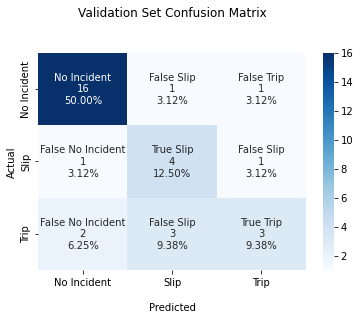

In [11]:
# Matrix with labels
group_names = ['No Incident','False Slip','False Trip',
                'False No Incident', 'True Slip', 'False Slip',
                'False No Incident', 'False Slip', 'True Trip']
group_counts = ["{0:0.0f}".format(value) for value in my_result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in my_result.flatten()/np.sum(my_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(my_result, annot=labels, fmt='', cmap='Blues')
ax.set_title('Validation Set Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Incident','Slip', 'Trip'])
ax.yaxis.set_ticklabels(['No Incident','Slip', 'Trip'])

## Display the visualization of the Confusion Matrix.
plt.show()